<a href="https://colab.research.google.com/github/jnsbrdbr/hopefully_last_thesis/blob/main/9921_1000_smote_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer
import collections
from sklearn.model_selection import KFold
from numpy import mean
from sklearn.model_selection import cross_val_score,cross_val_predict
from numpy import std

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
with pd.HDFStore('/content/drive/MyDrive/last/last_result_1000',  mode='r') as newstore:
    result = newstore.select('result')

In [4]:
result

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,label
0,-1.715972,-3.099936,-0.041249,-2.772767e-14,4.332345e-14,0.077295,1.691428,3.341114,-7.723126e-15,1.346899e-14,...,8.552268e-03,-7.904882e-03,-1.212833e-03,-1.659093e-03,1.148052e-02,1.006673e-03,-3.733283e-03,-6.138676e-03,-1.311463e-03,1
1,-1.715972,-3.099936,-0.041249,1.466600e-13,2.316440e-14,0.077295,1.691428,3.341114,6.940363e-14,-8.596380e-14,...,-3.740869e-03,7.979555e-03,-2.192725e-02,1.557035e-02,-9.506592e-03,-1.656848e-02,-2.315918e-02,3.512108e-03,-8.894766e-03,1
2,-1.715972,-3.099936,-0.041249,7.395959e-14,2.474722e-14,0.077295,1.691428,3.341114,-3.695459e-14,8.705053e-14,...,-2.983303e-02,-1.798253e-03,-5.303236e-03,3.443212e-03,5.501828e-03,1.251424e-02,1.744383e-02,-1.360941e-02,1.550322e-02,1
3,-1.715972,-3.099936,-0.041249,-4.481138e-14,3.516572e-14,0.077295,1.691428,3.341114,1.210173e-13,-2.066566e-13,...,-3.381541e-04,-1.686177e-02,2.876218e-03,-1.164208e-02,4.846784e-03,-1.108571e-02,-5.616712e-03,-8.548495e-03,-1.204656e-02,1
4,-1.715972,-3.099936,-0.041249,-1.149663e-14,2.689488e-14,0.077295,1.691428,3.341114,-1.479650e-13,2.326630e-13,...,7.341793e-15,-7.293987e-15,-7.855589e-15,-4.889254e-15,1.341662e-14,-5.313069e-15,-3.317777e-15,-5.544234e-15,2.698971e-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.114893,-4.572474,-0.754679,-5.411471e-13,2.859262e-14,8.797502,-0.661164,-0.063010,-5.418220e-02,-1.896785e-04,...,-4.855958e-02,-2.616962e-03,6.899072e-03,-4.836771e-03,3.054156e-03,6.665845e-03,7.002829e-04,8.451918e-03,-9.629763e-03,1
996,-2.114893,-4.572474,-0.754679,-5.375491e-13,2.843942e-14,8.797502,-0.661164,-0.063010,-2.275366e-02,4.725734e-02,...,-7.965602e-03,1.382855e-02,1.030486e-02,4.727405e-04,-3.912152e-03,-2.744242e-02,-8.723051e-03,-8.249622e-03,1.890977e-02,1
997,-2.114893,-4.572474,-0.754679,-5.376020e-13,2.778318e-14,8.797502,-0.661164,-0.063010,-2.662274e-02,-4.298936e-02,...,4.801682e-03,2.631254e-02,-1.099122e-03,-1.685858e-02,-3.284569e-02,1.066669e-02,-9.583355e-04,4.785683e-02,-7.653977e-03,1
998,-2.114893,-4.572474,-0.754679,-5.381695e-13,2.793383e-14,8.797502,-0.661164,-0.063010,1.507282e-02,-1.728412e-02,...,1.853990e-02,-1.137538e-02,-3.079020e-02,-1.654584e-03,1.811239e-02,1.087194e-02,1.212881e-02,7.125102e-04,-1.037818e-02,1


In [5]:
#divide data in to data_label and non_data label

y=result.label
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(y)):
  if y[i]==1:
    y[i]=0
  else:
    y[i]=1

result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel

In [6]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64


# **SMOTE**

In [7]:
#numer of fake and real in dataset

print('Number of fake in y:',collections.Counter(y)[0])
print('Number of real in y:',collections.Counter(y)[1])

Number of fake in y: 990
Number of real in y: 10


In [8]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn import svm


#skf = StratifiedKFold(n_splits=10,shuffle=True)
kf = KFold(n_splits=10,shuffle=True)
acc_score = list()
res_fpr = list()
res_tpr = list()
res_probas_=list()
Y_test_lst=list()
pred_values_lst=list()

for fold, (train_index, test_index) in enumerate(kf.split(X,y)):#enumerate(

    print(f'For fold {fold}:')
    #splitting data

    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index] 
    print('Number of real in y_train:',collections.Counter(y_train)[0])
    print('Number of fake in y_train:',collections.Counter(y_train)[1])
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    print('Number of real in y_test:',collections.Counter(y_test)[0])
    print('Number of fake in y_test:',collections.Counter(y_test)[1])
      


    #smote
    sm = SMOTE(sampling_strategy=0.334)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    print('Number of fake in y_train_oversampled:',collections.Counter(y_train_oversampled)[1])
    print('Number of real in y_train_oversampled:',collections.Counter(y_train_oversampled)[0])

    
    #the model
    model = svm.SVC(kernel="rbf",gamma=0.01 , C=0.01, probability=True)#LogisticRegression(C=0.05,solver='newton-cg',penalty='l2')
    model.fit(X_train_oversampled, y_train_oversampled )  

    #predicting with x_test
    y_pred = model.predict(X_test)
    Y_test_lst.append(y_test)
    pred_values_lst.append(y_pred)


    #y_test_arr=np.array(y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    
    print('\n',f'True Positives: {tp}')
    print(f'False Negatives: {fn}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')

    fpr=(np.divide(fp,(fp+tn)))
    if fp==0 :
      fpr=0
    
    tpr=(np.divide(tp,(tp+fn)))
    if tp==0:
      tpr=0
    if collections.Counter(y_test)[1]==0 :
      tpr=1

    y_test_arr=np.array(y_test)
    count=0
    con=0
    for i in range(0,len(y_test_arr)):
       if y_test_arr[i]==1:
          count+=1
       else:
         con+=1

    #printting the acc for every fold
    
    acc=model.score(X_test, y_test)
    print(f'Accuracy: {acc}')
    acc_score.append(acc)
    
    print('\n',"number of real:",con)
    print("number of fake:",count)

    print('\n','fpr=%.3f' % (mean(fpr)))#tpr=%.4f : mean(tpr), 
    res_fpr.append(mean(fpr))
    print()
    print('\n','tpr=%.3f' % (mean(tpr)))#tpr=%.4f : mean(tpr), 
    res_tpr.append(mean(tpr))
    print('------------------')
    i+=1


#printting acc in total
avg_acc_score = np.sum(acc_score)/10
print(f'total Accuracy: {avg_acc_score}')
total_fpr=np.sum(res_fpr)/10
total_tpr=np.sum(res_tpr)/10
print(f'\n\n total_fpr= {total_fpr}')
print(f'\n\n total_tpr= {total_tpr}')

For fold 0:
Number of real in y_train: 890
Number of fake in y_train: 10
Number of real in y_test: 100
Number of fake in y_test: 0
Number of fake in y_train_oversampled: 297
Number of real in y_train_oversampled: 890

 True Positives: 0
False Negatives: 0
False Positives: 0
True Negatives: 100
Accuracy: 1.0

 number of real: 100
number of fake: 0

 fpr=0.000


 tpr=1.000
------------------
For fold 1:
Number of real in y_train: 891
Number of fake in y_train: 9
Number of real in y_test: 99
Number of fake in y_test: 1
Number of fake in y_train_oversampled: 297
Number of real in y_train_oversampled: 891

 True Positives: 0
False Negatives: 1
False Positives: 0
True Negatives: 99
Accuracy: 0.99

 number of real: 99
number of fake: 1

 fpr=0.000


 tpr=0.000
------------------
For fold 2:
Number of real in y_train: 894
Number of fake in y_train: 6
Number of real in y_test: 96
Number of fake in y_test: 4
Number of fake in y_train_oversampled: 298
Number of real in y_train_oversampled: 894

 

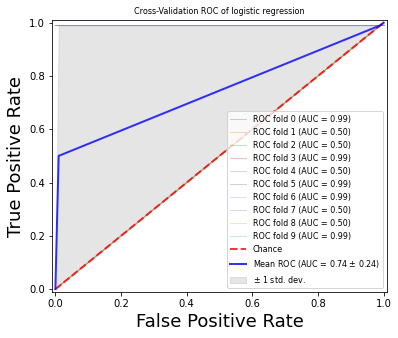

In [9]:
#ROC_AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')


kf = KFold(n_splits=10,shuffle=True)
tprs = []
aucs = []
fpr_lst=list()
tpr_lst=list()
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(6,5))
i = 0
for _ , _ in kf.split(X,y):
    # Compute ROC curve and area the curve
    #fpr, tpr, thresholds = roc_curve(Y_test_lst[i],res_probas_[i][:,1] )
    
    fpr, tpr, thresholds = roc_curve(Y_test_lst[i],pred_values_lst[i])
    fpr[np.isnan(fpr)] = 0.00
    tpr[np.isnan(tpr)] = 0.99
    fpr_lst.append(mean(fpr))
    tpr_lst.append(mean(tpr))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of logistic regression',fontsize=8)
plt.legend(loc="lower right", prop={'size': 8})
plt.show()